<a href="https://colab.research.google.com/github/rahmanziaur/rahman/blob/master/FedChart1_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

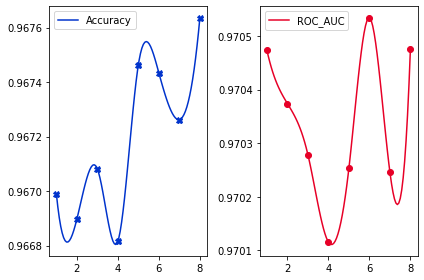

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

round = [1, 2, 3, 4, 5, 6, 7, 8]
accuracy = [0.966989875, 0.966897368, 0.967081308, 0.966815889, 0.967464089, 0.967433274, 0.967262268, 0.967636049]
roc_auc = [0.970473468, 0.970374048, 0.970278621, 0.970115602, 0.970253766, 0.970534146, 0.970245838, 0.970476449]

fig, ax = plt.subplots(nrows=1, ncols=2)

xnew = np.linspace(1, 8, num=100, endpoint=True)
spl = make_interp_spline(round, accuracy, k=3)  # type: BSpline
power_smooth = spl(xnew)

#ax.plot(xnew, power_smooth, color='tab:red', label='Throughput')
l0 = ax[0].plot(xnew, power_smooth, color='#0033CC',label='Accuracy')
l1 = ax[0].plot(round, accuracy, 'X',color='#0033CC')
#ax[0].legend(loc='upper right', bbox_to_anchor=(0.75, 0.98))

ax[0].legend()

color = '#E70027'
xnew1 = np.linspace(1, 8, num=100, endpoint=True)
spl = make_interp_spline(round, roc_auc, k=3)  # type: BSpline
power_smooth = spl(xnew1)

l2 = ax[1].plot(xnew1, power_smooth, color=color,label='ROC_AUC')
l3 = ax[1].plot(round, roc_auc, 'o',color=color)
ax[1].legend()
#ax[1].legend(loc='upper right', bbox_to_anchor=(0.75, 0.98))

# ax[0].grid(b=True, color='#999999', linestyle=':')
# ax[1].grid(b=True, which='both', color='0.65', linestyle='-')
# ax.grid(True)

# ax[0].text(1, 1.2, 'Accuracy', va='center', rotation='vertical')
# ax[1].text(1.2, 1.2, 'ROC_AUC', va='center', rotation='vertical')

# ax[0].text(1.3, 3, 'Round', ha='center')
# ax[0].text(1.6, 3, 'Round', ha='center')


fig.tight_layout()

plt.savefig('f6.pdf')
#ax.plot(round, accuracy)
#ax.plot(round, roc_auc)
plt.show()



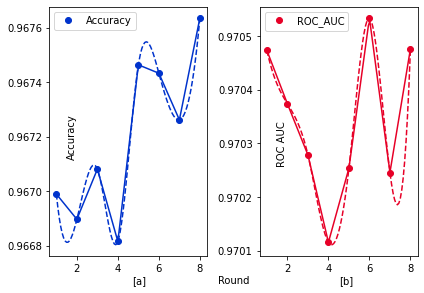

In [17]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

round = [1, 2, 3, 4, 5, 6, 7, 8]
accuracy = [0.966989875, 0.966897368, 0.967081308, 0.966815889, 0.967464089, 0.967433274, 0.967262268, 0.967636049]
roc_auc = [0.970473468, 0.970374048, 0.970278621, 0.970115602, 0.970253766, 0.970534146, 0.970245838, 0.970476449]

f1 = interp1d(round, accuracy)
f2 = interp1d(round, accuracy, kind='cubic')

xnew = np.linspace(1, 8, num=100, endpoint=True)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(round, accuracy, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--', color='#0033CC')
ax[0].legend(['Accuracy'], loc='best')
f3 = interp1d(round, roc_auc)
f4 = interp1d(round, roc_auc, kind='cubic')

ax[1].plot(round, roc_auc, 'o', xnew, f3(xnew), '-', xnew, f4(xnew), '--', color='#E70027')
ax[1].legend(['ROC_AUC'], loc='best')


ax[0].text(1.5, .9672, 'Accuracy', va='center', rotation='vertical')
ax[1].text(1.5, .9703, 'ROC AUC', va='center', rotation='vertical')

#ax[0].text(4.1, .96665, '[a]', va='center', rotation='horizontal')

fig.text(.55, .0001, 'Round', ha='center')
fig.text(.33, .0001, '[a]', ha='center')
fig.text(.81, .0001, '[b]', ha='center')

fig.tight_layout()
plt.savefig('Accuracy-ROC.pdf')
plt.show()

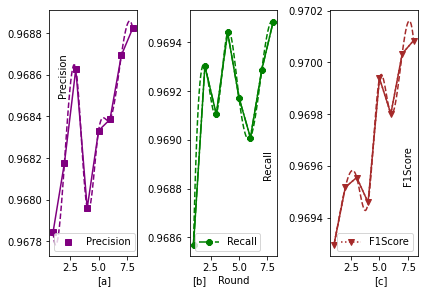

In [22]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np


round = [1, 2, 3, 4, 5, 6, 7, 8]
precision = [0.967843831, 0.968176901, 0.968628287, 0.967959166, 0.968331993, 0.968385696, 0.968693912, 0.968824148]
recall = [0.968569636, 0.969302356, 0.969105482, 0.96944052, 0.96917212, 0.969009042, 0.969287395, 0.96948427]
f1score = [0.969294369, 0.969517052, 0.969554842, 0.969458401, 0.969938636, 0.969801426, 0.970034063, 0.970084786
] 

f1 = interp1d(round, precision)
f2 = interp1d(round, precision, kind='cubic')

xnew = np.linspace(1, 8, num=100, endpoint=True)

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].plot(round, precision, 's', xnew, f1(xnew), '-', xnew, f2(xnew), '--', color='purple')
ax[0].legend(['Precision'], loc='best')

f3 = interp1d(round, recall)
f4 = interp1d(round, recall, kind='cubic')

ax[1].plot(round, recall, '-.8', xnew, f3(xnew), '-', xnew, f4(xnew), '--', color='green')
ax[1].legend(['Recall'], loc='best')

f5 = interp1d(round, f1score)
f6 = interp1d(round, f1score, kind='cubic')

ax[2].plot(round, f1score, ':v', xnew, f5(xnew), '-', xnew, f6(xnew), '--', color='brown')
ax[2].legend(['F1Score'], loc='best')

ax[0].text(1.4, .9686, 'Precision', va='center', rotation='vertical')
ax[1].text(7.1, .9689, 'Recall', va='center', rotation='vertical')
ax[2].text(7.1, .9696, 'F1Score', va='center', rotation='vertical')

fig.text(.55, .0001, 'Round', ha='center')
#ax[0].text(4.1, .96665, '[a]', va='center', rotation='horizontal')

fig.text(.25, .0001, '[a]', ha='center')
fig.text(.47, .0001, '[b]', ha='center')
fig.text(.89, .0001, '[c]', ha='center')

fig.tight_layout()
plt.savefig('Precision-Recall1-F1Score.pdf')
plt.show()



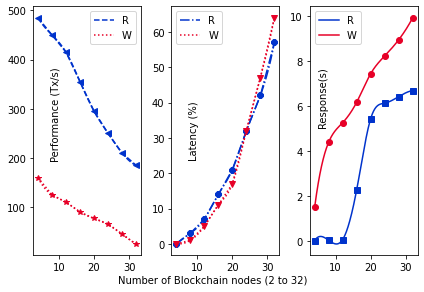

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import make_interp_spline, BSpline

df = pd.read_csv('tp-lat-del.csv')

# df_TP = pd.read_csv('throughput.csv')
# df_LAT = pd.read_csv('latency.csv')

# x = df_TP['Nodes']
# y = df_TP['Throughput']
# x1 = df_LAT['Nodes']
# y1 = df_LAT['Latency']

nodes = df['Nodes']
r_tp = df['R_TP']
w_tp = df['W_TP']
r_lat = df['RD_LAT']
w_lat = df['WR_LAT']
r_del = df['R_DEL']
w_del = df['W_DEL']

nodes_new = np.linspace(nodes.min(), nodes.max(), 300)
a_BSpline = interpolate.make_interp_spline(nodes, r_tp)
r_tp_new = a_BSpline(nodes_new)

a_BSpline_w = interpolate.make_interp_spline(nodes, w_tp)
w_tp_new = a_BSpline_w(nodes_new)

# def f(t):
#     return np.exp(-t) * np.cos(2*np.pi*t)

# t1 = np.arange(0.0, 5.0, 0.1)
# t2 = np.arange(0.0, 5.0, 0.02)

color_bl = '#0033CC'
color_vi = '#E70027'
fig, ax = plt.subplots(nrows=1, ncols=3)
#ax[0].plot(nodes_new,r_tp_new, 'bo', marker=5)
l0 = ax[0].plot( nodes_new, r_tp_new,'--', color=color_bl , label='R')
l1 = ax[0].plot(nodes, r_tp, '--<',color=color_bl)
#ax[0].plot(nodes_new, r_tp_new, 'bo', t2, f(t2), 'k')

l2 = ax[0].plot(nodes_new, w_tp_new,':', color=color_vi, label='W')
l3 = ax[0].plot(nodes, w_tp, ':*', color=color_vi)
#ax[0].plot(nodes,w_tp)

ax[0].legend()
#ax[0].legend(l2,"WR")

#ax[0].legend(l1, "RX_TP")
#ax[0].legend(l2,)

nodes_new1 = np.linspace(nodes.min(), nodes.max(), 300)
a_BSpline_lat_r = interpolate.make_interp_spline(nodes, r_lat)
r_lat_new = a_BSpline_lat_r(nodes_new1)

a_BSpline_lat_w = interpolate.make_interp_spline(nodes, w_lat)
w_lat_new = a_BSpline_lat_w(nodes_new1)

#ax[1].plot(nodes,r_lat)

m0 = ax[1].plot( nodes_new1, r_lat_new,'-.', color=color_bl , label='R')
m1 = ax[1].plot(nodes, r_lat, '-.8',color=color_bl)

#ax[1].plot(nodes,w_lat)

m2 = ax[1].plot(nodes_new, w_lat_new,':', color=color_vi, label='W')
m3 = ax[1].plot(nodes, w_lat, ':v', color=color_vi)

ax[1].legend()

nodes_new2 = np.linspace(nodes.min(), nodes.max(), 300)
a_BSpline_del_r = interpolate.make_interp_spline(nodes, r_del)
r_del_new = a_BSpline_del_r(nodes_new2)

a_BSpline_del_w = interpolate.make_interp_spline(nodes, w_del)
w_del_new = a_BSpline_del_w(nodes_new2)

#ax[2].plot(nodes,r_del)

n0 = ax[2].plot( nodes_new2, r_del_new, color=color_bl , label='R')
n1 = ax[2].plot(nodes, r_del, 's',color=color_bl)

#ax[2].plot(nodes,w_del)

n2 = ax[2].plot(nodes_new2, w_del_new, color=color_vi, label='W')
n3 = ax[2].plot(nodes, w_del, 'o', color=color_vi)

ax[2].legend()

ax[0].text(7.5, 290, 'Performance (Tx/s)', va='center', rotation='vertical')
ax[1].text(7.5, 32, 'Latency (%)', va='center', rotation='vertical')
ax[2].text(5, 6.4, 'Response(s)', va='center', rotation='vertical')

plt.savefig('f8.pdf')
fig.tight_layout()
fig.text(0.5, 0.001, 'Number of Blockchain nodes (2 to 32)', ha='center')
plt.show()


